<a href="https://colab.research.google.com/github/HardikZala/Data-Analysis/blob/main/Bank_conversion_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

# **Purpose**

Create machine learning model to predict whether a customer is likely to convert based on the following input perameters.

**Models Used:**

1.   Regression Model
2.   Uplift Model

#**Bank Client Data from Kaggle:**



#Raw Data Columns:

* age (numeric)
* job : type of job (categorical)
*  marital : marital status (categorical)
* education (categorical)
* default: has credit in default? (binary)
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary)
* loan: has personal loan? (binary)
# related with the last contact of the current campaign:
* contact: contact communication type (categorical)
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical)
* duration: last contact duration, in seconds (numeric)
# other attributes:
* campaign: number of contacts performed during this campaign(numeric)
* pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric)
* previous: number of contacts performed before this campaign(numeric)
* poutcome: outcome of the previous marketing campaign (categorical)
# Output variable (desired target):
* y - has the client subscribed a term deposit? (binary)



In [2]:
df = pd.read_csv('train.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Taking a look at the null values and Data type of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.shape

(45211, 17)

Checking for any highly correlated values. Knowinging highly correlated values can help identify columns to mitigate to ensure unduly influence over regression models

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'balance'),
 Text(0, 2.5, 'day'),
 Text(0, 3.5, 'duration'),
 Text(0, 4.5, 'campaign'),
 Text(0, 5.5, 'pdays'),
 Text(0, 6.5, 'previous')]

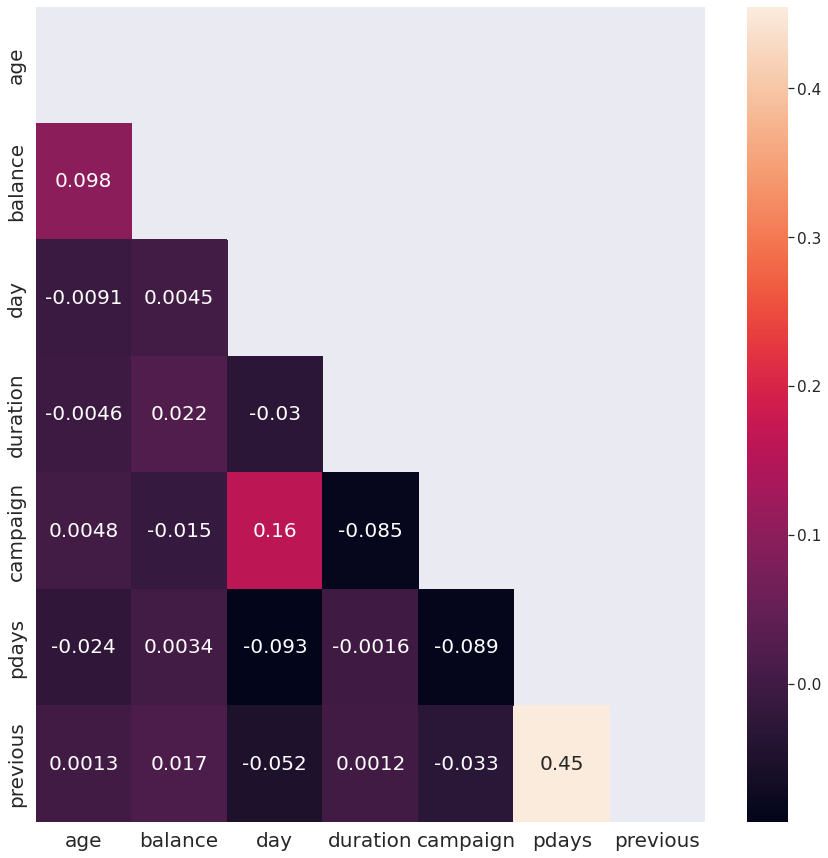

In [7]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1.4)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(df.corr(),
                      annot = True,
                      mask= mask,
                      annot_kws = {
                          'fontsize':20,
                          }
                      )
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 20)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 20)

From this we can judge there are no columns that are highly correlated, hence no columns will likely be dropped.

In [8]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**Distribution Matrix**

the matrix will provide an alternative perspective to the EDA process:
- 'Age','Balance', and 'Duration' are positively skewed and will require normalization for Logisitic Regression

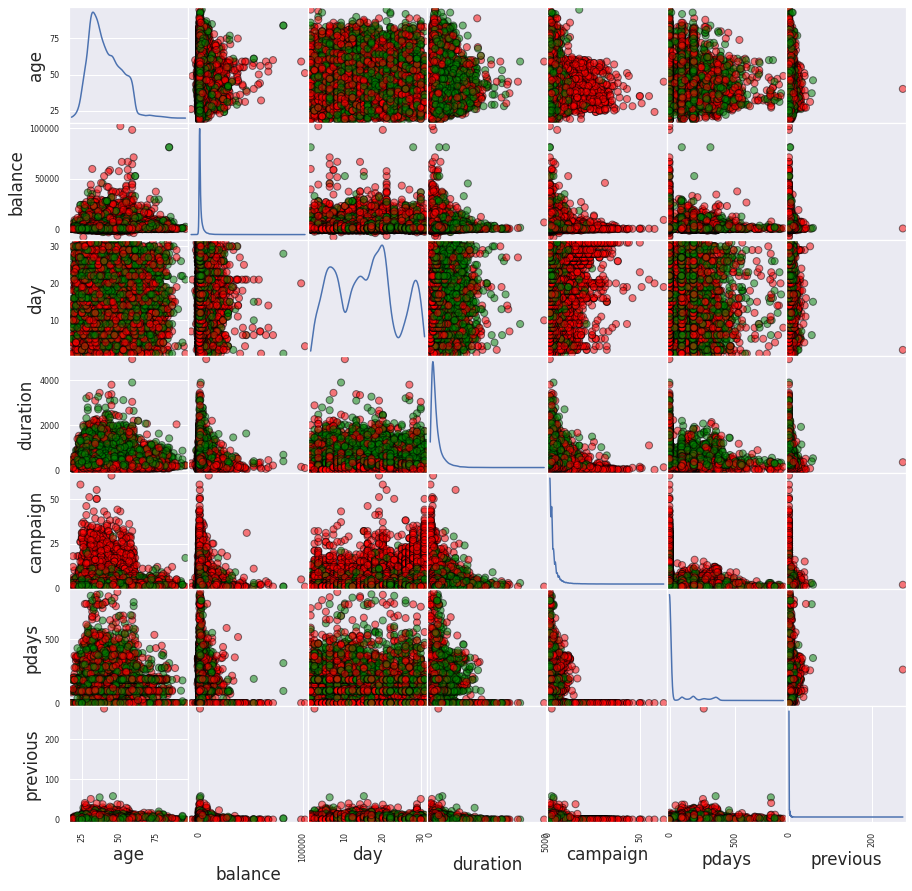

In [9]:
df['color_list'] = ['green' if i=='yes' else 'red' for i in df['y']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'y'],
                                       c=df['color_list'],
                                       figsize= [15,15],
                                       diagonal='kde',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

In [10]:
del df['color_list']

In [11]:
#outlier
print(df['previous'].max())
print(df['previous'].mean())

275
0.5803233726305546


Outlier inferred from the matrix:
*   Someone has been contacted 275 times
*   This outlier will be dealt with later on



# Previous Contact Outcome

Interestingly this dataset has information regarding previously contacted customers and the success rate: This provides the basis for an uplift model, which will be explored to identify how to maximize sales outreach for future campaigns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

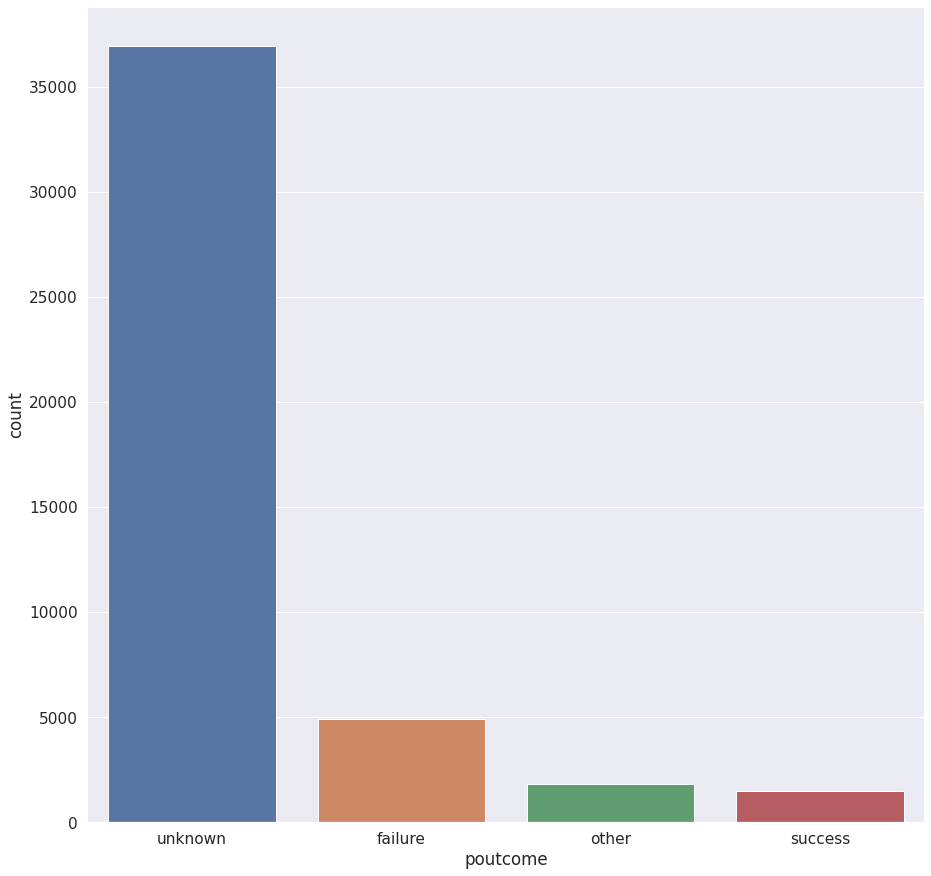

In [12]:
sns.countplot(df['poutcome'])
df['poutcome'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


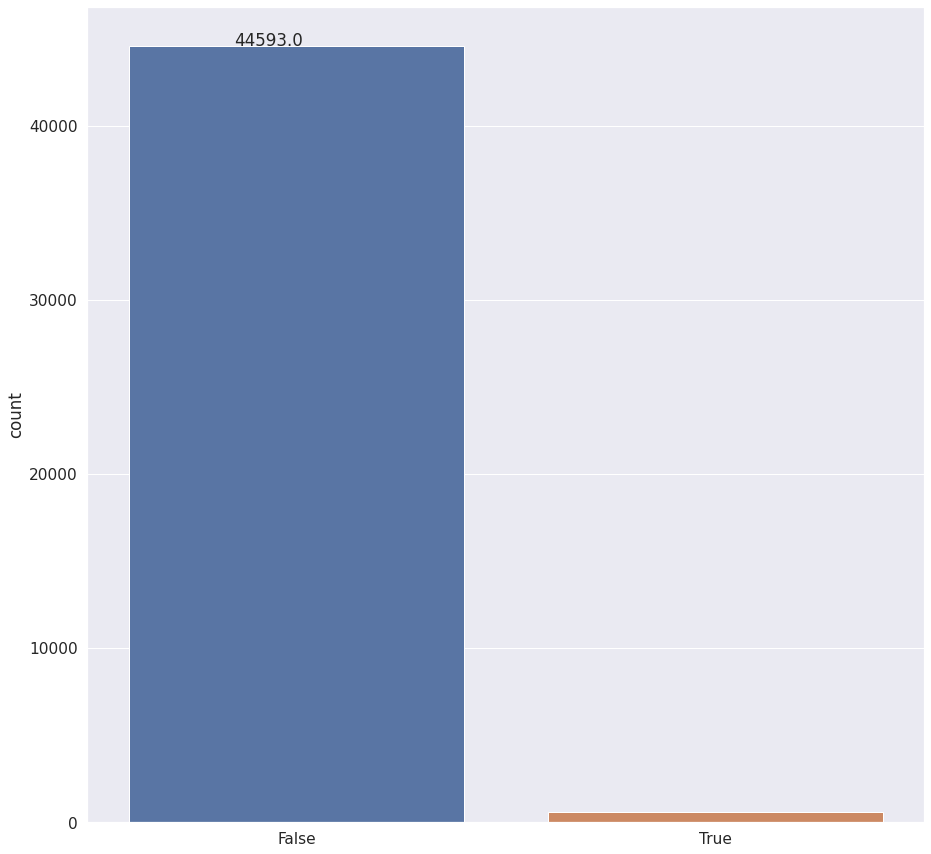

In [13]:
new_conversions = ((df['poutcome'] =='failure') & (df['y'] == 'yes'))
ax = sns.countplot(new_conversions)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
   plt.show()

Only about 1% of customers had converted from the previous campaign efforts. There is a great opportunity to improve conversion rates so company resources can be better utilized considering only 22% had been contacted previously(As shown in the figure below). This poses an even stronger case for a predictive and causal model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


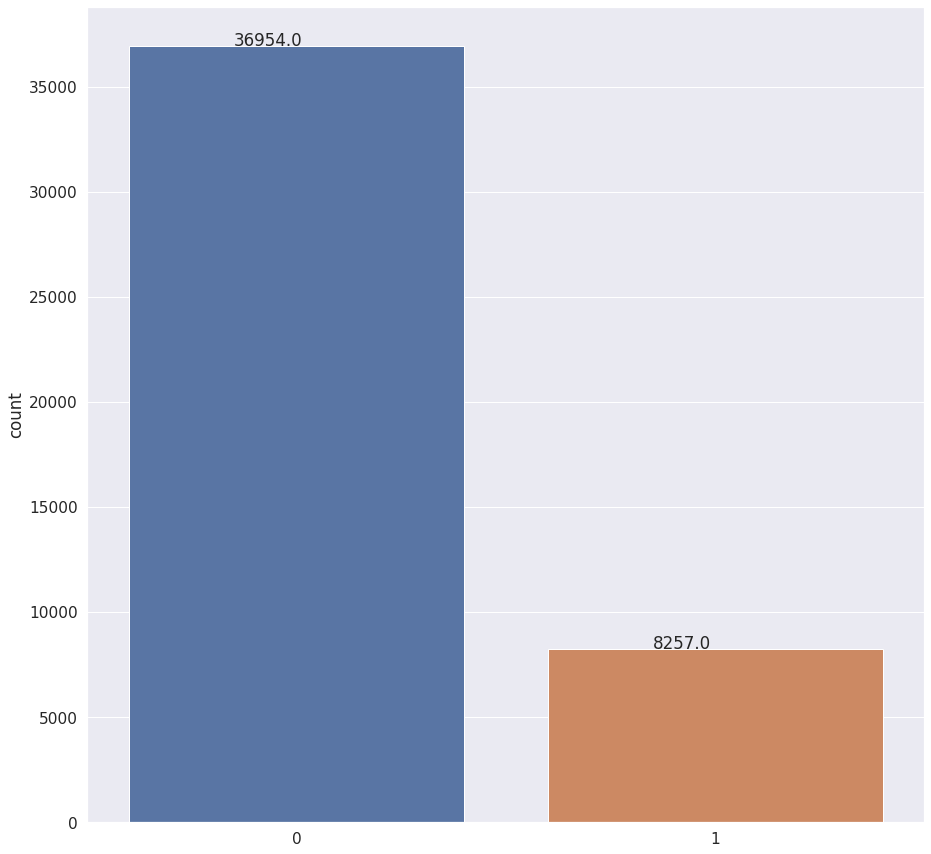

In [14]:
previous_contacts = [0 if i==0 else 1 for i in df['previous']]
pc_ax = sns.countplot(previous_contacts)

for p in pc_ax.patches:
   pc_ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

The following are retained customers 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


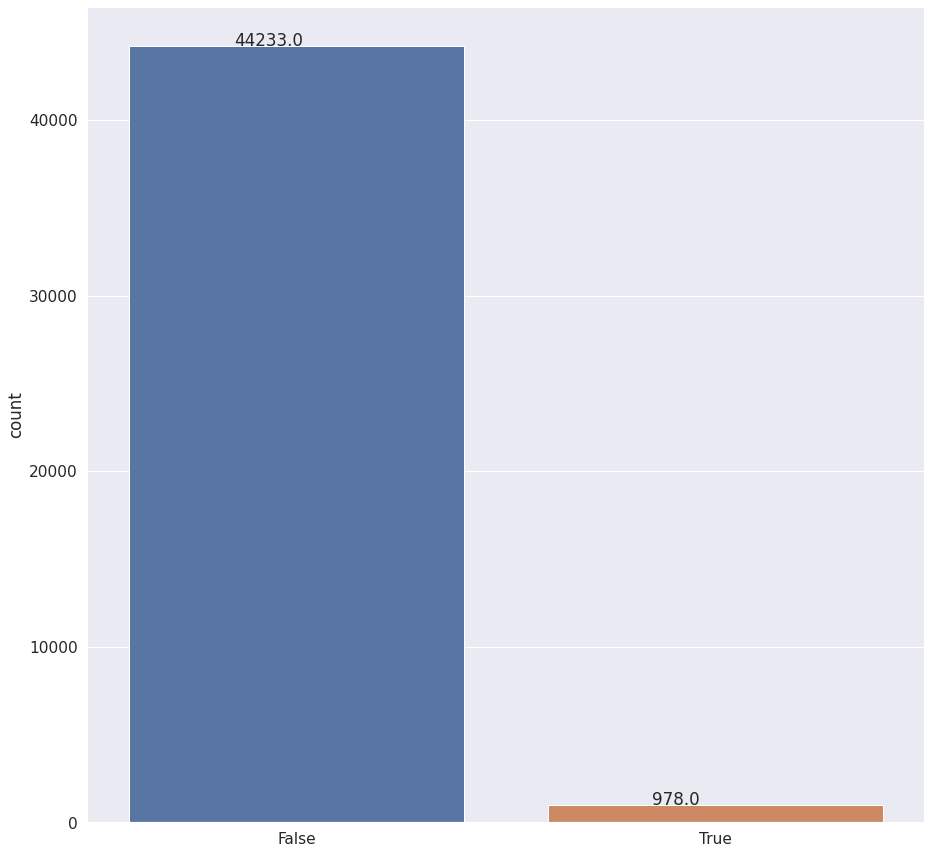

In [15]:
retained_conversions = ((df['poutcome'] =='success') & (df['y'] == 'yes'))
rc_ax = sns.countplot(retained_conversions)

for p in rc_ax.patches:
   rc_ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Based off the EDA presented above, we will explore a Logistic Regression Model initially to predict whether a customer is likely to convert based off the data provided in the training set.

#**Data Preprocessing**
For Logistic Regression

The Data Preprocessing Steps will be the following:


*   Removing redundant columns based on relevance to the model
*   Converting Columns into Binary Columns to ensure accurate fitting for the regression model
* Converting categorical columns into One-Hot encoded values to fit into the regression model
* Making continuous columns more gaussian through various normalization methods 



In [16]:
# Create Dataframe to check data type, and number of unique values
dtypes = {col:[df[col].dtype, df[col].nunique()] for col in df.columns}
dtypes_df = pd.DataFrame(dtypes)
dtypes_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object
1,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2


**Skewness**
Skewness on a lot of the columns is incredibly high. For a Regression Model, there is a benefit to making the columns more gaussian 

In [17]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

We will drop contact, day, month, and duration due to many clients not being contacted, and is a safe presumption that dropping these columns will not lead to important information loss.

Additionally we will the 'previous' column into a binary column (contacted or not) to ensure 

Define each step of the function individually, then see if you can create a new function to capture all of them

In [18]:
df = pd.read_csv('train.csv', sep = ';')

In [19]:
#Turn yes/no columns into encoded lists
encode_list = df[['default','housing', 'loan', 'y',]].apply(pd.Series.value_counts)
encode_list = pd.DataFrame(encode_list) 

def binary(df):
  # Create columns into binary columns
  for col in encode_list:
    df[col].replace({'yes':1, 'no':0}, inplace = True)
  return df

In [20]:
#Convert catgorical values into OHE
def one_hot_encoder(df):
  ohe = OneHotEncoder()
  feature_array = ohe.fit_transform(df[['job','education','marital','poutcome']]).toarray()
  feature_l = ohe.categories_
  feature_l = np.array(feature_l).ravel() # Convert different arrays into 1 continuous array
  feature_labels = []
  for i in feature_l:
    for j in i:
      feature_labels.append(j)
  ohe_df = pd.DataFrame(feature_array, columns = feature_labels)
  df = df.join(ohe_df, how = 'outer')
  # classifying unknowns into their respective columns
  # Renaming the duplicated names for clarity
  df.columns.values[-1] = "unknown_poutcome"
  df.columns.values[-8] = "unknown_education"
  df = df.rename(columns={'unknown':'unknown_job'})
  df['unknown_job']
  df.drop(columns = ['job','education','marital','poutcome'], inplace = True)
  return df

In [21]:
#Drop irrelevant columns 
def drop_columns(df):
  df.drop(columns = ['contact','day','month','duration','pdays'],axis=1, inplace=True)
  return df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


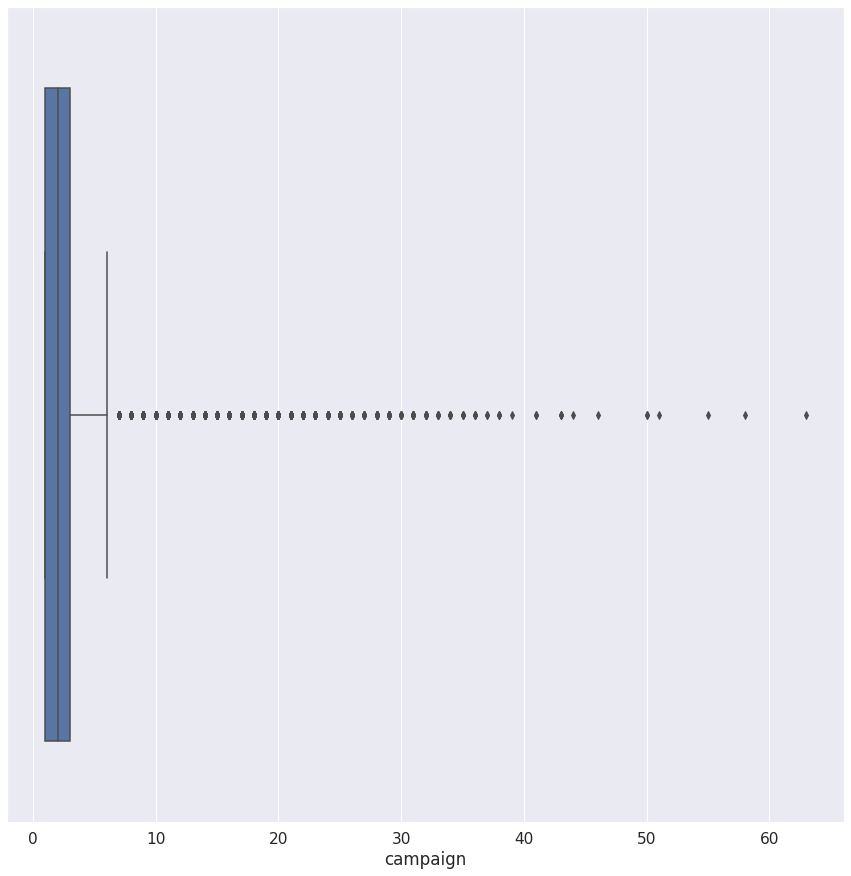

In [22]:
sns.boxplot(df['campaign'])

#**Normalize continuous values**

we will make use of the log(x+1) method for normalization after trying multiple normalization methods:
- 

our data is largely positively skewed, and also contains negative values.

In [23]:
# Negative values
sum(1 for number in df['balance'] if number < 0)

3766

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


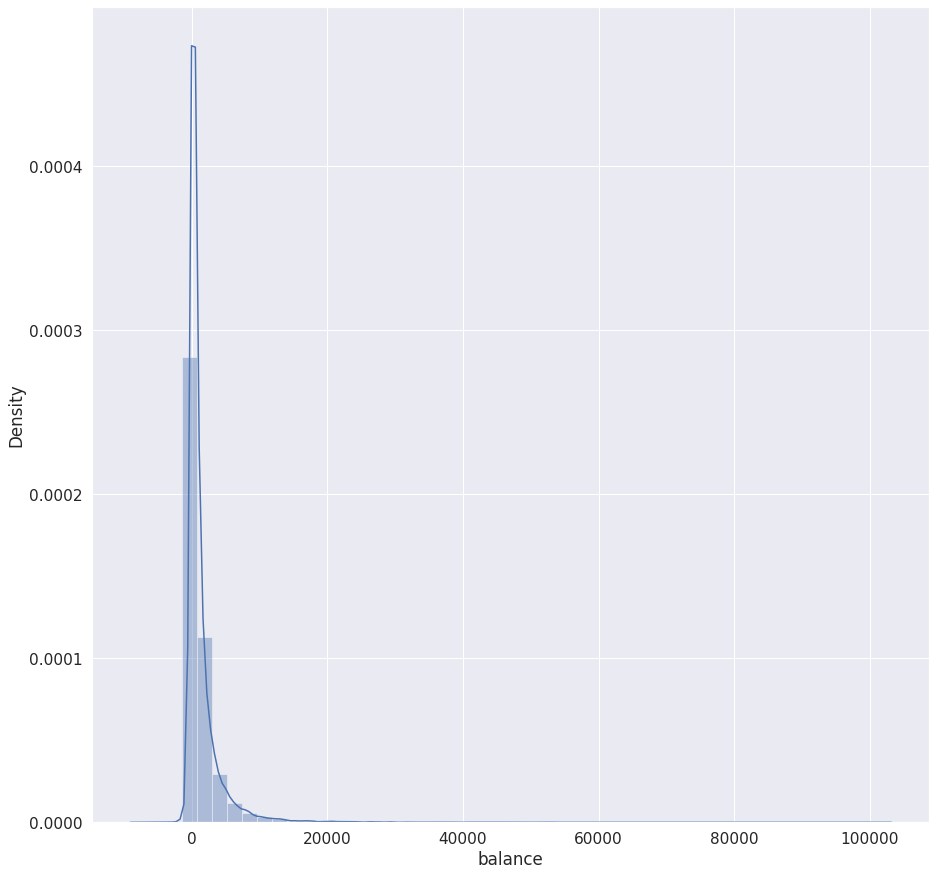

In [24]:
sns.distplot(df['balance'])

In [25]:
df['balance'] = df['balance'].apply(lambda x: (x - df['balance'].mean())/df['balance'].std())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


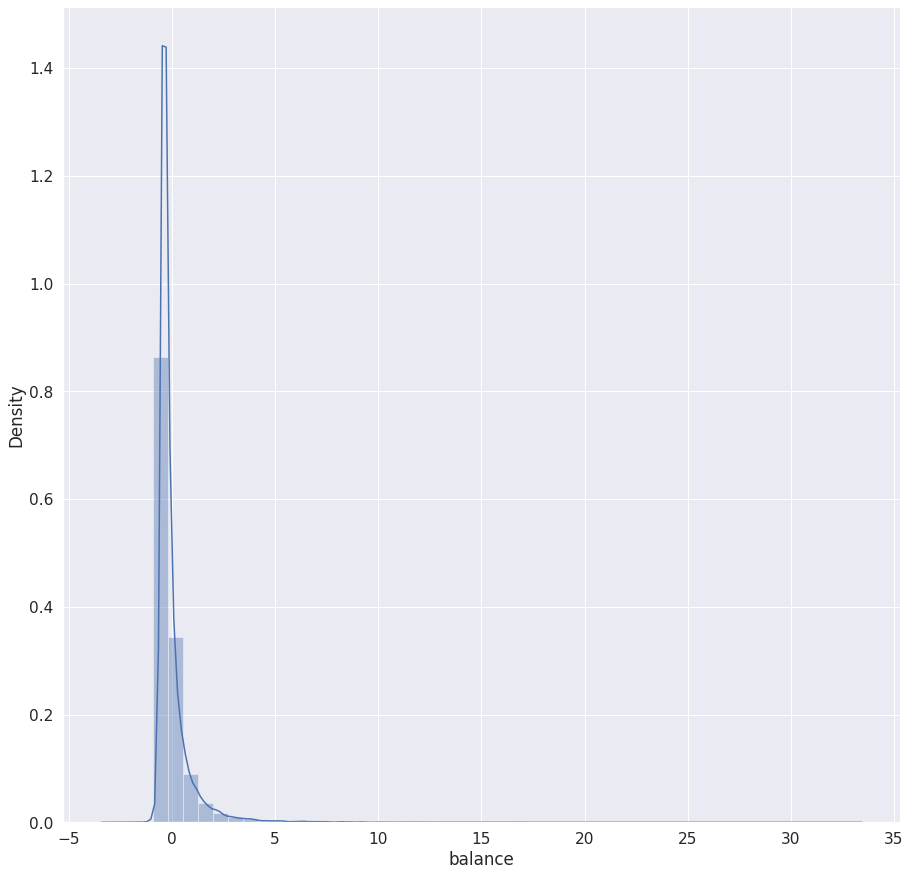

In [26]:
sns.distplot(df['balance'])

In [27]:
# function to transform continuous value
old_skew = df.skew().sort_values(ascending=False)
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    df[feature] = df_log
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [28]:
def preprocess(df): 
  df['balance'] = df['balance'].apply(lambda x: (x - df['balance'].mean())/df['balance'].std())
  df['previous'] = [0 if i==0 else 1 for i in df['previous']] 
  df['age'] = df['age'].apply(lambda x:(x - df['age'].min(axis=0))/(df['age'].max(axis=0)-df['age'].min(axis=0)))
  df = binary(df)
  df = one_hot_encoder(df)
  drop_columns(df)
  logTrans(feature="balance")
  campaign = np.array(df['campaign'].values).reshape(-1,1) 
  df['campaign'] = PowerTransformer('box-cox').fit_transform(campaign)
  return df

As we can see the skewness of the Balance feature has been decreased improving the ability of the regression model to make accurate predictions.

In [29]:
df = pd.read_csv('train.csv', sep = ";")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


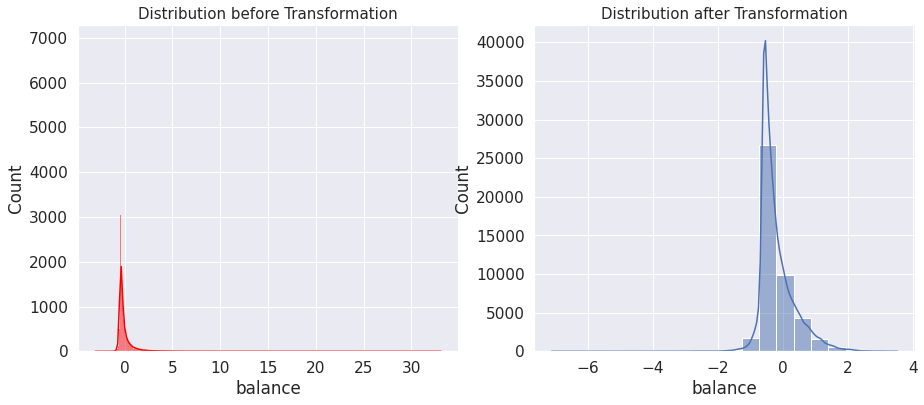

Skewness was 8.36 before & is 1.25 after Log transformation.


In [30]:
df = preprocess(df)

#**Logistic Regression** 

In [31]:
x = df.drop(columns = ['y'])
y = df['y'].values.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2, random_state=30)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

In [33]:
y_pred = log_reg.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.8941722879575362


In [47]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log_reg,param_grid=params,cv=10)

In [ ]:
log_model.fit(x_train,y_train)

In [64]:
predict = log_model.predict(x_test)

In [65]:
log_model.best_params_

{'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [66]:
predict = log_model.predict(x_test)

In [67]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8016
           1       0.63      0.16      0.26      1027

    accuracy                           0.89      9043
   macro avg       0.77      0.57      0.60      9043
weighted avg       0.87      0.89      0.87      9043



#**Confusion Matrix**

In [57]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[7922,   94],
       [ 863,  164]])

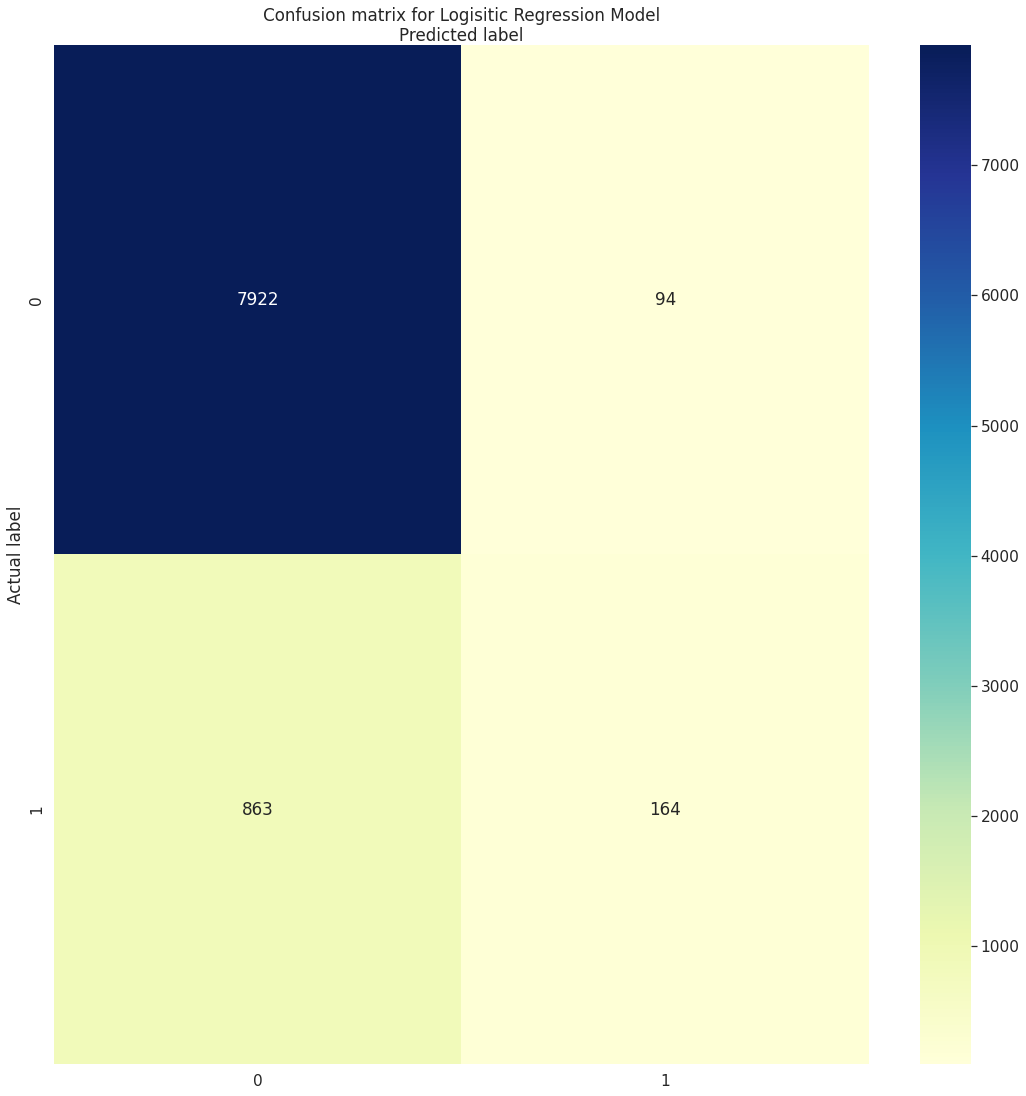

In [58]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
target_probailities_log = log_model.predict_proba(x_test)[:,1]

In [61]:
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

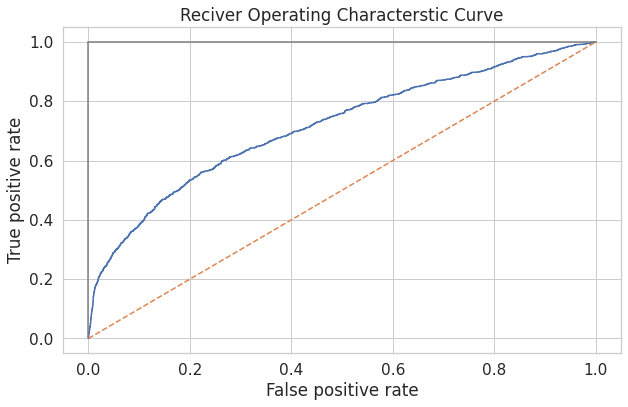

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [63]:
roc_auc_score(y_test,target_probailities_log)

0.7158902132443973